In [115]:
#import libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_style('whitegrid')


In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


import warnings
warnings.filterwarnings('ignore')

In [117]:
#Load the data
#look at the info, stats, head and tail of the data

df = pd.read_csv('asset/Customer-Churn-Records.csv')

In [118]:
#EDA and visualization
df.shape

(10000, 18)

In [119]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [120]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [121]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [122]:
#drop 'RowNumber', 'CustomerId', 'Surname' as they are irrelevant to churn outcome

df.drop(['RowNumber', 'CustomerId', 'Surname'], axis= 'columns', inplace=True)
df.dtypes 

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [123]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [125]:
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [126]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203800,0.402842,0.00,0.00,0.000,0.0000,1.00
Complain,10000.0,0.204400,0.403283,0.00,0.00,0.000,0.0000,1.00


In [127]:
df.shape

(10000, 15)

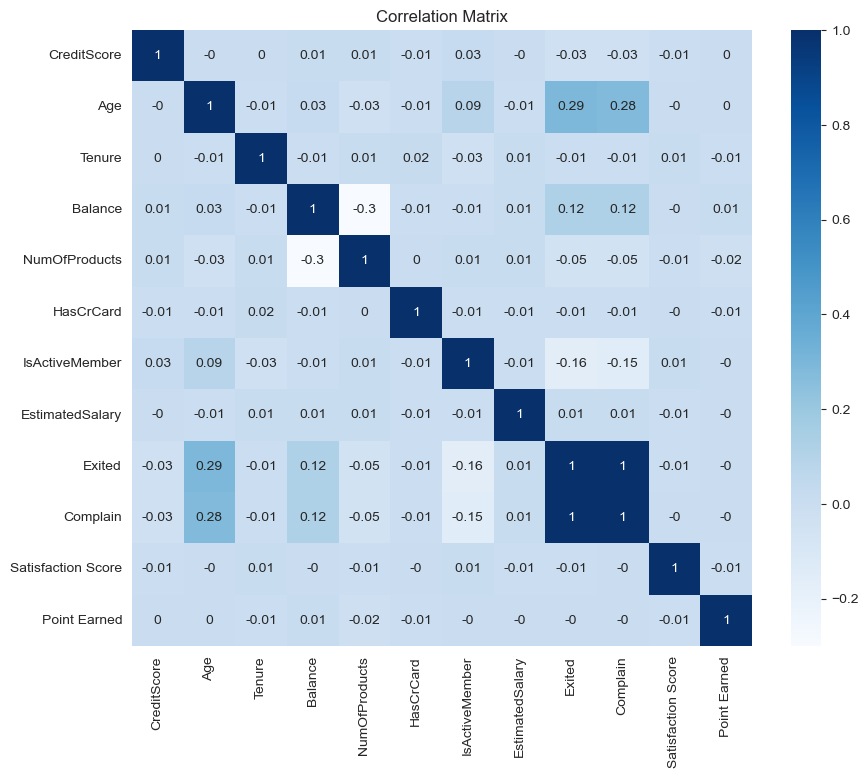

In [128]:
#EDA is the process of analysing different features against the target/label to understand and uncover the inter-relationship between them.
#Let's visualize some important features against churn.
corr = df.corr(numeric_only = True).round(2)

plt.figure(figsize= (10, 8))
plt.title('Correlation Matrix')
sns.heatmap(data = corr, annot= True, cmap = 'Blues', cbar= True)
plt.show()

In [129]:
corr['Exited'].sort_values().plot(kind='bar')

<Axes: >

In [130]:
corr['Exited'].sort_values(ascending = True)

IsActiveMember       -0.16
NumOfProducts        -0.05
CreditScore          -0.03
Tenure               -0.01
HasCrCard            -0.01
Satisfaction Score   -0.01
Point Earned         -0.00
EstimatedSalary       0.01
Balance               0.12
Age                   0.29
Exited                1.00
Complain              1.00
Name: Exited, dtype: float64

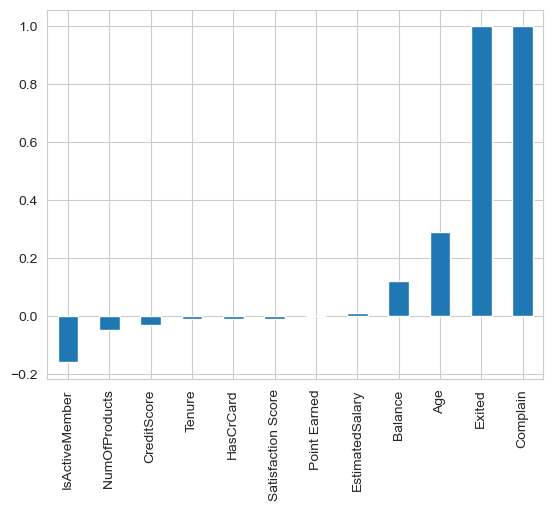

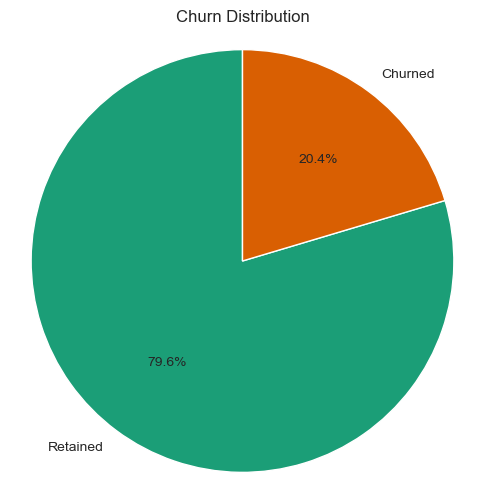

In [131]:
#Exited's overall distribution.
labels = ['Retained', 'Churned']
plt.figure(figsize = (6,6))
plt.pie(x = df['Exited'].value_counts(), labels= labels, colors=plt.cm.Dark2.colors,
        autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.axis('equal')
plt.show() 

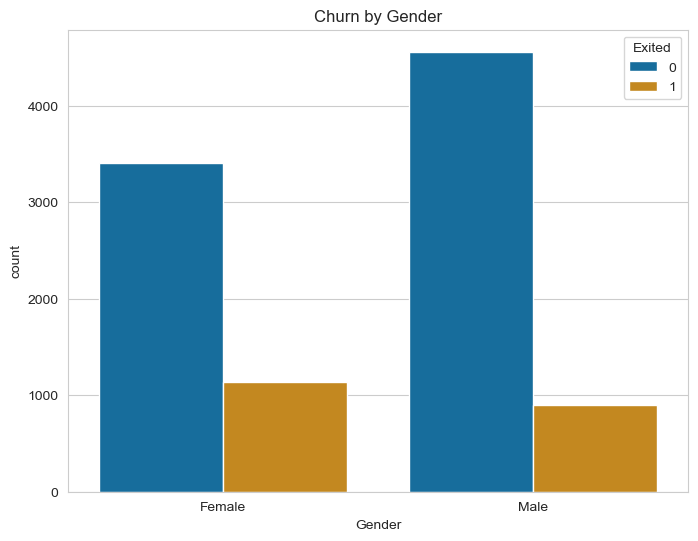

In [132]:
#Which gender is most likley to churn?
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x= 'Gender', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Gender')
plt.show()


In [133]:
#churn rate by gender

churn_rate_gender = df.groupby('Gender')['Exited'].mean()*100
print(churn_rate_gender)

Gender
Female    25.071539
Male      16.474253
Name: Exited, dtype: float64


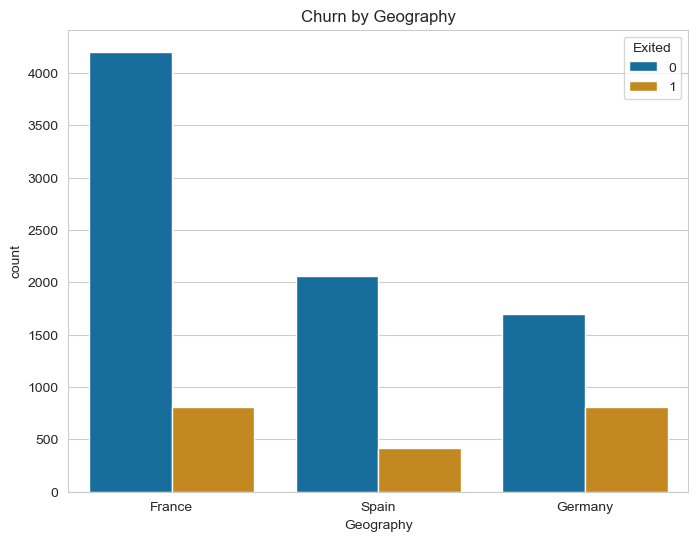

In [134]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x= 'Geography', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Geography')
plt.show() 

In [135]:
churn_rate_geography = df.groupby('Geography')['Exited'].mean()*100
print(churn_rate_geography)

Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64


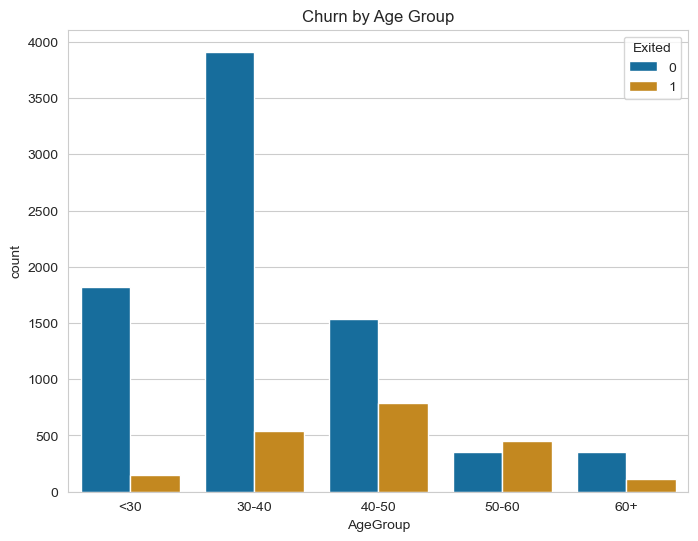

In [136]:
#Create a new column called AgeGroup which puts different ages into age buckets.
df['AgeGroup'] = pd.cut(df['Age'], bins = [0, 30, 40, 50, 60, np.inf],
                        labels = ['<30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize = (8,6))
plt.title('Churn by Age Group')
sns.countplot(data = df, x = 'AgeGroup', hue = 'Exited', palette= 'colorblind')
plt.show() 

In [137]:
churn_rate_age = df.groupby('AgeGroup')['Exited'].mean()*100
print(churn_rate_age)

AgeGroup
<30       7.520325
30-40    12.109638
40-50    33.965517
50-60    56.210790
60+      24.784483
Name: Exited, dtype: float64


In [138]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned',
       'AgeGroup'],
      dtype='object')

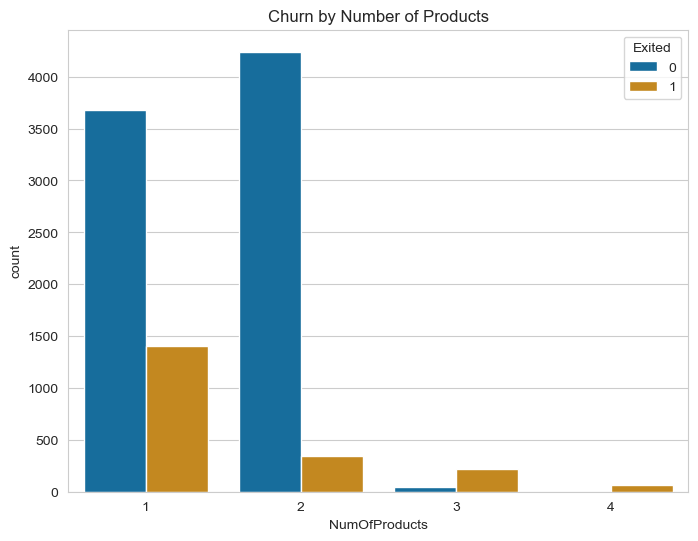

In [139]:
#We see a negative correlation between them, so most likely, as number of products go up,churn rate should decrease.
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x= 'NumOfProducts', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Number of Products')
plt.show() 

In [140]:
churn_rate_products = df.groupby('NumOfProducts')['Exited'].mean()*100
print(churn_rate_products)

NumOfProducts
1     27.714398
2      7.603486
3     82.706767
4    100.000000
Name: Exited, dtype: float64


customers with more than two products are most likely to leave

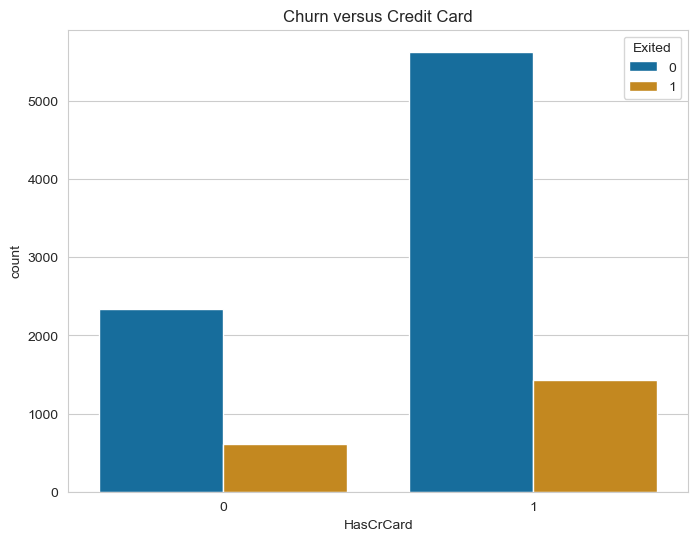

In [141]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x= 'HasCrCard', hue = 'Exited', palette = 'colorblind')
plt.title('Churn versus Credit Card')
plt.show() 

In [142]:
churn_rate_card = df.groupby('HasCrCard')['Exited'].mean()*100
print(churn_rate_card)

HasCrCard
0    20.814941
1    20.198441
Name: Exited, dtype: float64


Customers with credit cards are slightly less likely to exit

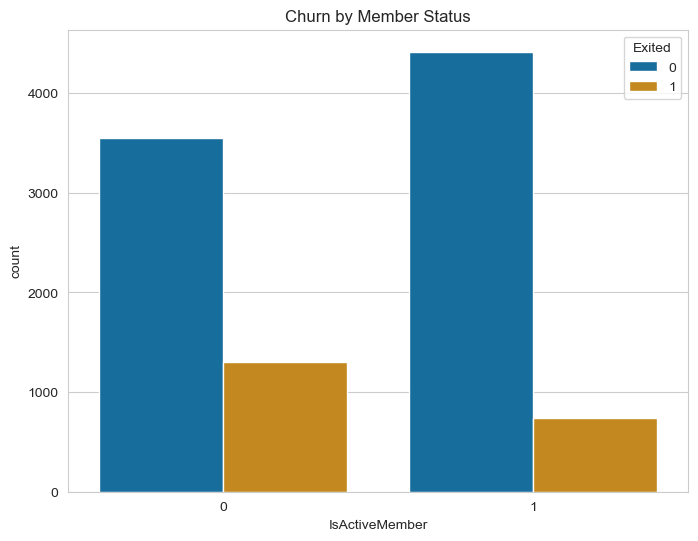

In [143]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x= 'IsActiveMember', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Member Status')
plt.show() 

In [144]:
churn_rate_active_status = df.groupby('IsActiveMember')['Exited'].mean()*100
print(churn_rate_active_status)

IsActiveMember
0    26.871520
1    14.269074
Name: Exited, dtype: float64


As expected, non-active customers are exiting more

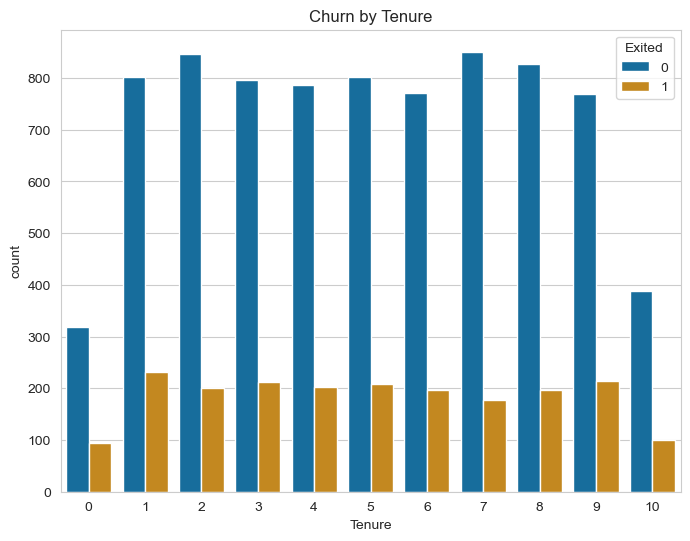

In [145]:
plt.figure(figsize = (8,6))
plt.title('Churn by Tenure')
sns.countplot(x = 'Tenure', hue = 'Exited', palette = 'colorblind', data = df)
plt.show()


In [146]:
churn_rate_tenure = df.groupby('Tenure')['Exited'].mean()*100
print(churn_rate_tenure)

Tenure
0     23.002421
1     22.415459
2     19.179389
3     21.110010
4     20.525784
5     20.652174
6     20.268873
7     17.217899
8     19.219512
9     21.747967
10    20.612245
Name: Exited, dtype: float64


The average churn rate is around 20% across tenures but customers with ten years are slightly less likely to exit the bank.

In [147]:
df.dtypes

CreditScore              int64
Geography               object
Gender                  object
Age                      int64
Tenure                   int64
Balance                float64
NumOfProducts            int64
HasCrCard                int64
IsActiveMember           int64
EstimatedSalary        float64
Exited                   int64
Complain                 int64
Satisfaction Score       int64
Card Type               object
Point Earned             int64
AgeGroup              category
dtype: object

In [148]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup
4604,681,France,Male,25,5,0.00,1,0,1,90860.97,0,0,4,DIAMOND,875,<30
5589,715,Germany,Female,37,9,105489.31,1,0,0,143096.49,1,1,5,GOLD,267,30-40
2871,671,Spain,Male,38,0,92674.94,2,1,0,3647.57,0,0,4,SILVER,759,30-40
8455,609,France,Female,53,6,0.00,2,1,1,124218.27,0,0,3,GOLD,645,50-60
4032,430,France,Male,38,9,0.00,2,1,1,12050.77,0,0,5,SILVER,573,30-40


In [149]:
#create dummies for categorical variables

df1 = pd.get_dummies(df, columns= ['Geography','Gender', 'Card Type'],
                         dtype = int) 

In [150]:
df1.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,AgeGroup,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
6074,811,45,5,0.00,2,1,1,146123.19,0,0,...,40-50,1,0,0,1,0,1,0,0,0
5741,709,42,9,118546.71,1,0,1,77142.85,0,0,...,40-50,1,0,0,0,1,0,1,0,0
5644,738,37,8,100565.94,1,1,1,128799.86,0,0,...,30-40,0,0,1,1,0,1,0,0,0
9402,810,69,3,27288.43,1,1,1,110509.90,0,0,...,60+,0,1,0,0,1,0,0,0,1
7796,692,36,3,0.00,2,1,1,8282.22,0,0,...,30-40,1,0,0,1,0,0,0,0,1


In [151]:
df1.shape

(10000, 22)

Train Test Split
Let's split the data in the 80-20 ratio where 80% of the data will be used to train the model. First, we create X and y.

In [152]:
#drop complain and agegroup

df2 = df1.drop(['Complain','AgeGroup'], axis = 1)

In [153]:
df2.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
7151,442,34,4,0.00,2,1,0,68343.08,0,5,529,1,0,0,0,1,1,0,0,0
1948,680,35,9,0.00,2,0,0,143774.06,0,5,590,0,0,1,0,1,0,0,1,0
3601,608,50,6,0.00,1,1,0,93568.77,1,4,343,1,0,0,0,1,0,0,0,1
8421,693,43,6,128760.32,1,1,0,36342.79,0,2,488,1,0,0,0,1,0,0,1,0
7740,665,51,8,0.00,1,1,1,38928.48,1,2,317,0,0,1,1,0,1,0,0,0


In [154]:
df2.shape

(10000, 20)

In [155]:
X = df2.drop('Exited', axis=1)
y = df2['Exited']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [157]:
#This is a pre-processing technique to standardize the independent features in a fixed range. 
#It is done to handle highly varying magnitudes/values/units in the data.
scaler = MinMaxScaler()

In [158]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

In [159]:
#Logistic Regression is a linear regression problem where the target/dependent variable has a binary output. 
#This target variable is regressed on a set of independent features similar to a linear regression.
logreg_model = LogisticRegression()

In [160]:
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [161]:
predictions = logreg_model.predict(X_test)
predictions 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [162]:
X_test

array([[0.492     , 0.18918919, 0.3       , ..., 1.        , 0.        ,
        0.        ],
       [0.546     , 0.33783784, 0.1       , ..., 0.        , 0.        ,
        1.        ],
       [0.502     , 0.35135135, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.76      , 0.39189189, 0.7       , ..., 0.        , 1.        ,
        0.        ],
       [0.684     , 0.14864865, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.556     , 0.28378378, 0.1       , ..., 0.        , 0.        ,
        1.        ]])

In [163]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

In [172]:
print('Accuracy Score:')

accuracy_score(y_test, predictions)

Accuracy Score:


0.812

In [165]:
print("Classification Report")

print('\n')

print(classification_report(y_test, predictions))

Classification Report


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [166]:
#provides insight into  true positives ,false positives ,true negatives,false negatives
print('Confusion Matrix')

print('\n')

print(confusion_matrix(y_test, predictions))

Confusion Matrix


[[1547   60]
 [ 316   77]]


In [167]:
#true negatives+true positives/true negatives+true positives+false negatives+false positives
print('Accuracy of Model :')

(1547+77)/(1547+77+316+60)

Accuracy of Model :


0.812

In [168]:
#true positives/true positives+false positives
print('Precision of Model:')

1547/(1547+316)

Precision of Model:


0.8303811057434246

In [169]:
#recall true positivie rate
#true positives/true positives+false negatives
print('Recall Score of the Model:')

1547/(1547+60)

Recall Score of the Model:


0.9626633478531424

In [170]:
#f1 score harmonic mean of precision and recall
precision = 83
recall = 96

f1_score = 2*(precision*recall)/(precision+recall)

In [171]:
print('F1 Score of the Model:')

print(f1_score)

F1 Score of the Model:
89.02793296089385
